# This is the Saildrone and SSS collocation code. 


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr
from glob import glob

# Read in USV data
Read in the Saildrone USV file either from a local disc or using OpenDAP.



In [39]:
filename_collocation_data = 'F:/data/cruise_data/saildrone/baja-2018/ccmp_collocation_data.nc'
#filename_usv = 'https://podaac-opendap.jpl.nasa.gov/opendap/hyrax/allData/insitu/L2/saildrone/Baja/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
filename_usv='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
ds_usv = xr.open_dataset(filename_usv)
ds_usv.close()
ds_usv = ds_usv.isel(trajectory=0).swap_dims({'obs':'time'}).rename({'longitude':'lon','latitude':'lat'})
ds_usv = ds_usv.sel(time=slice('2018-04-12T02','2018-06-10T18')) #get rid of last part and first part where USV being towed
ds_usv['lon'] = ds_usv.lon.interpolate_na(dim='time',method='linear') #there are 6 nan values
ds_usv['lat'] = ds_usv.lat.interpolate_na(dim='time',method='linear')
ds_usv['wind_speed']=np.sqrt(ds_usv.UWND_MEAN**2+ds_usv.VWND_MEAN**2)
ds_usv['wind_dir']=np.arctan2(ds_usv.VWND_MEAN,ds_usv.UWND_MEAN)*180/np.pi
ds_usv_subset = ds_usv.copy(deep=True)
ds_usv_subset = ds_usv_subset.where(np.logical_not((ds_usv.time.dt.hour>12)&(ds_usv.wind_speed<7.5)))
ds_usv_subset = ds_usv_subset.where(np.logical_not((ds_usv.time.dt.hour<6)&(ds_usv.wind_speed<7.5)))
ds_usv_subset = ds_usv_subset.where(np.logical_not((ds_usv.time>np.datetime64('2018-05-24T12')) & (ds_usv.time<np.datetime64('2018-05-26T12'))))
#ds_usv_subset = ds_usv.dropna(dim='time',subset={'UWND_MEAN'})   #get rid of all the nan
#print(ds_usv_subset.UWND_MEAN[2000:2010].values)

C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\xarray\core\nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


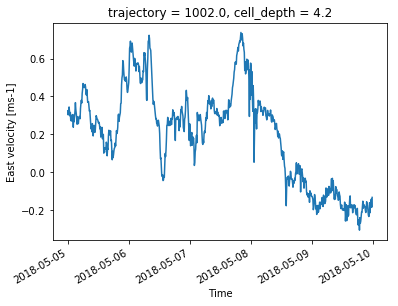

In order to use open_mfdataset you need to either provide a path or a list of filenames to input

Here we use the USV cruise start and end date to read in all data for that period

C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


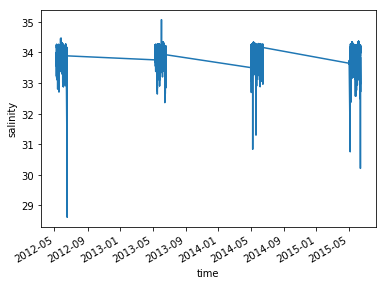

In [13]:
filename = 'F:/data/cruise_data/access/rockfish_casts_2015.nc'
ds = xr.open_dataset(filename)
ds = ds.swap_dims({'row':'time'})
ds = ds.rename({'latitude':'lat','longitude':'lon'})
ds.salinity.plot()

In [14]:
filelist = glob('F:/data/sat_data/smap/SSS\L2/V02.0/r00001_05000/RSS*.nc')
filelist

['F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03359.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03360.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03361.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03362.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03363.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03364.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03365.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03366.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03367.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03368.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03369.nc',
 'F:/data/sat_data/smap/SSS\\L2/V02.0/r00001_05000\\RSS_smap_sss_L2C_r03370.nc',
 'F:/data/sat_data/smap/SSS\

# Read in SSS L2 data
Read in data using open_mfdataset with the option coords='minimal'

The dataset is printed out and you can see that rather than straight xarray data array for each of the data variables open_mfdataset using dask arrays

In [54]:
lon = np.arange(0,360)
np.mod(lon+180,360)-180
np.mod(lon + 180,360) - 180

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

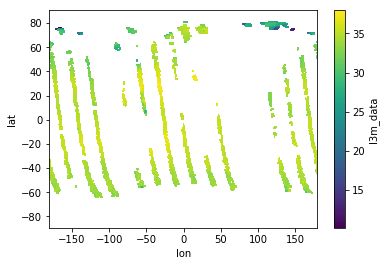

In [48]:
filename = 'f:/data/sat_data/aquarius/Q2011237.L3m_DAY_SCIA_V5.0.RAIN_MASK_SSS_1deg'
ds = xr.open_dataset(filename)
ds.close()
ds.coords['phony_dim_0']=np.arange(90,-90,-1)
ds.coords['phony_dim_1']=np.arange(-180,180)
ds = ds.rename({'phony_dim_0':'lat','phony_dim_1':'lon'})
ds.l3m_data.plot()

In [15]:
#ds_sat = xr.open_mfdataset(filelist,coords='minimal')
ds_sat = xr.open_dataset(filelist[0])
#ds_sat = ds_sat.isel(depth=0).drop('year').rename({'latitude':'lat'}).rename({'longitude':'lon'})
#ds_sat = ds_sat.sortby('lat').sel(lon=slice(20.0,379.00))
#ds_sat.coords['lon'] = (ds_sat.coords['lon'] + 180) % 360 - 180
#ds_sat = ds_sat.sortby('lon')
ds_sat.close()
print(ds_sat)  #check units 
ds_sat

<xarray.Dataset>
Dimensions:            (look: 2, polarization_2: 2, polarization_3: 3, polarization_4: 4, xdim_grid: 1560, ydim_grid: 720)
Dimensions without coordinates: look, polarization_2, polarization_3, polarization_4, xdim_grid, ydim_grid
Data variables:
    time               (ydim_grid, xdim_grid, look) datetime64[ns] ...
    cellat             (ydim_grid, xdim_grid, look) float32 ...
    cellon             (ydim_grid, xdim_grid, look) float32 ...
    gland              (ydim_grid, xdim_grid, look) float32 ...
    gice               (ydim_grid, xdim_grid) float32 ...
    sss_smap           (ydim_grid, xdim_grid, look) float32 ...
    surtep             (ydim_grid, xdim_grid) float32 ...
    winspd             (ydim_grid, xdim_grid) float32 ...
    sss_ref            (ydim_grid, xdim_grid) float32 ...
    iqc_flag           (ydim_grid, xdim_grid, look) int32 ...
    zang               (ydim_grid, xdim_grid, look) float32 ...
    alpha              (ydim_grid, xdim_grid, look) 

<xarray.Dataset>
Dimensions:            (look: 2, polarization_2: 2, polarization_3: 3, polarization_4: 4, xdim_grid: 1560, ydim_grid: 720)
Dimensions without coordinates: look, polarization_2, polarization_3, polarization_4, xdim_grid, ydim_grid
Data variables:
    time               (ydim_grid, xdim_grid, look) datetime64[ns] ...
    cellat             (ydim_grid, xdim_grid, look) float32 ...
    cellon             (ydim_grid, xdim_grid, look) float32 ...
    gland              (ydim_grid, xdim_grid, look) float32 ...
    gice               (ydim_grid, xdim_grid) float32 ...
    sss_smap           (ydim_grid, xdim_grid, look) float32 ...
    surtep             (ydim_grid, xdim_grid) float32 ...
    winspd             (ydim_grid, xdim_grid) float32 ...
    sss_ref            (ydim_grid, xdim_grid) float32 ...
    iqc_flag           (ydim_grid, xdim_grid, look) int32 ...
    zang               (ydim_grid, xdim_grid, look) float32 ...
    alpha              (ydim_grid, xdim_grid, look) 


1. First let's subset the data to make it smaller to deal with by using the cruise lat/lons




In [8]:
#Step 1 from above
subset = ds_sat.sel(lon=slice(ds_usv_subset.lon.min().data,ds_usv_subset.lon.max().data),
                    lat=slice(ds_usv_subset.lat.min().data,ds_usv_subset.lat.max().data))

#now collocate with usv lat and lons
ds_collocated = subset.interp(lat=ds_usv_subset.lat,lon=ds_usv_subset.lon,time=ds_usv_subset.time,method='linear')
ds_collocated_nearest = subset.interp(lat=ds_usv_subset.lat,lon=ds_usv_subset.lon,time=ds_usv_subset.time,method='nearest')


# A larger STD that isn't reflective of uncertainty in the observation
The collocation above will result in multiple USV data points matched with a single satellite
observation.    The USV is sampling every 1 min and approximately few meters, while the satellite
is an average over a footprint that is interpolated onto a daily mean map.  While calculating the mean would results in a valid mean, the STD would be higher and consist of a component that reflects the uncertainty of the USV and the satellite and a component that reflects the natural variability in the region that is sampled by the USV

Below we use the 'nearest' collocation results to identify when multiple USV data are collcated to
a single satellite observation.
This code goes through the data and creates averages of the USV data that match the single CCMP collocated value.


In [9]:
ilen,index = ds_collocated_nearest.dims['time'],0
ds_tem = ds_collocated_nearest.copy(deep=True)
duu, duv1, duv2, dlat, dlon, dut = [],[],[],[],[],np.empty((),dtype='datetime64')
while index <= ilen-2:
    index += 1
    if np.isnan(ds_collocated_nearest.u[index]):
        continue
    if np.isnan(ds_tem.u[index]):
        continue
   # print(index, ilen)
    iend = index + 730
    if iend > ilen-1:
        iend = ilen-1
    ds_tem_subset = ds_tem.u[index:iend]
    ds_tem_subset2 = ds_tem.v[index:iend]
    ds_usv_subset2ucur = ds_usv_subset.vel_east_30m[index:iend]
    ds_usv_subset2vcur = ds_usv_subset.vel_north_30m[index:iend]
    ds_usv_subset2lat = ds_usv_subset.lat[index:iend]
    ds_usv_subset2lon = ds_usv_subset.lon[index:iend]
    ds_usv_subset2time = ds_usv_subset.time[index:iend]
    cond = ((ds_tem_subset==ds_collocated_nearest.u[index]) & (ds_tem_subset2==ds_collocated_nearest.v[index]))
    notcond = np.logical_not(cond)
    #cond = ((ds_tem.analysed_sst==ds_collocated_nearest.analysed_sst[index]))
    #notcond = np.logical_not(cond)
    masked = ds_tem_subset.where(cond)
    if masked.sum().data==0:  #don't do if data not found
        continue
    masked_usvucur = ds_usv_subset2ucur.where(cond,drop=True)
    masked_usvvcur = ds_usv_subset2vcur.where(cond,drop=True)
    masked_usvlat = ds_usv_subset2lat.where(cond,drop=True)
    masked_usvlon = ds_usv_subset2lon.where(cond,drop=True)
    masked_usvtime = ds_usv_subset2time.where(cond,drop=True)
    duu=np.append(duu,masked_usvucur.mean().data)
    duv1=np.append(duv1,masked_usvvcur.mean().data)
    dlat=np.append(dlat,masked_usvlat.mean().data)
    dlon=np.append(dlon,masked_usvlon.mean().data)
    tdif = masked_usvtime[-1].data-masked_usvtime[0].data
    mtime=masked_usvtime[0].data+np.timedelta64(tdif/2,'ns')
#    if mtime>dut.max():
#        print(index,dut.shape[0],masked_usvtime[0].data,masked_usvtime[-1].data-masked_usvtime[0].data)
    dut=np.append(dut,mtime)
    ds_tem.u[index:iend]=ds_tem.u.where(notcond)
    ds_tem.v[index:iend]=ds_tem.v.where(notcond)
dut2 = dut[1:]  #remove first data point which is a repeat from what array defined       
ds_new=xr.Dataset(data_vars={'vel_east': ('time',duu),'vel_north':('time',duv1),
                             'lon': ('time',dlon),
                             'lat': ('time',dlat)},
                  coords={'time':dut2})
ds_new.to_netcdf('F:/data/cruise_data/saildrone/baja-2018/oscar_downsampled_usv_data2.nc')

# redo the collocation
Now, redo the collocation, using 'linear' interpolation using the averaged data.  This will interpolate the data temporally onto the USV sampling which has been averaged to the satellite data grid points

In [10]:
ds_collocated_averaged = subset.interp(lat=ds_new.lat,lon=ds_new.lon,time=ds_new.time,method='linear')
ds_collocated_averaged

<xarray.Dataset>
Dimensions:  (time: 162)
Coordinates:
    depth    float32 15.0
    lat      (time) float64 37.58 37.32 37.38 36.97 ... 37.3 37.45 37.55 37.64
    lon      (time) float64 -122.7 -122.8 -122.9 -122.7 ... -123.1 -122.9 -122.8
  * time     (time) datetime64[ns] 2018-04-12 ... 2018-06-10T17:55:00
Data variables:
    u        (time) float64 0.02423 0.04211 0.04228 ... -0.05069 -0.0574
    v        (time) float64 0.003738 -0.0401 -0.04799 ... -0.02103 -0.03263
    um       (time) float64 0.02423 0.04211 0.04228 ... -0.05069 -0.0574
    vm       (time) float64 0.003738 -0.0401 -0.04799 ... -0.02103 -0.03263
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2018 to Dec.26,2018
    year:           2018
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  03:39 30-Jan-2019
    version:        2009.0
    source:  

In [38]:
ds_collocated_averaged.to_netcdf('F:/data/cruise_data/saildrone/baja-2018/oscar_downsampled_collocated_usv_data3.nc')


In [42]:
ds_collocated_averaged['spd']=np.sqrt(ds_collocated_averaged.u**2+ds_collocated_averaged.v**2)
ds_new['spd'] = np.sqrt(ds_new.vel_east**2+ds_new.vel_north**2)
ds_collocated_averaged['dir']=np.arctan2(ds_collocated_averaged.v,ds_collocated_averaged.u)*180./np.pi
ds_new['dir'] = np.arctan2(ds_new.vel_north,ds_new.vel_east)*180./np.pi

usv_spd = ds_new.spd
sat_spd = ds_collocated_averaged.spd
usv_dir = ds_new.dir
sat_dir = ds_collocated_averaged.dir
dif_spd,dif_dir = usv_spd - sat_spd, usv_dir - sat_dir
cond,cond2 = (dif_dir > 180),(dif_dir < -180)
cond,cond2 = (dif_dir > 180),(dif_dir < -180)
dif_dir[cond]-=360
dif_dir[cond2]+=360
print('mean,std dif speed',[dif_spd.mean().data,dif_spd.std().data])
print('mean,std dir',[dif_dir.mean().data,dif_dir.std().data,dif_spd.shape[0]])

usv_spd = ds_new.spd
sat_spd = ds_collocated_averaged.spd
usv_dir = ds_new.dir
sat_dir = ds_collocated_averaged.dir
dif_spd,dif_dir = usv_spd - sat_spd, usv_dir - sat_dir
cond,cond2 = (dif_dir > 180),(dif_dir < -180)
cond,cond2 = (dif_dir > 180),(dif_dir < -180)
dif_dir[cond]-=360
dif_dir[cond2]+=360

cond = (np.isfinite(usv_spd) & np.isfinite(sat_spd))
usv_spd = usv_spd[cond]
sat_spd = sat_spd[cond]
usv_dir = usv_dir[cond]
sat_dir = sat_dir[cond]

sdif = dif_spd.dropna('time')
sdifcor = np.corrcoef(sat_spd,usv_spd)[0,1]
std_robust = np.nanmedian(np.abs(sdif - np.nanmedian(sdif))) * 1.482602218505602
ilen = sdif.shape[0]
print([sdif.mean().data,sdif.median().data,sdifcor,sdif.std().data,std_robust,
                    np.abs(sdif).mean().data,sdif.shape[0]])
sdif = dif_dir.dropna('time')
sdifcor = np.corrcoef(sat_dir,usv_dir)[0,1]
std_robust = np.nanmedian(np.abs(sdif - np.nanmedian(sdif))) * 1.482602218505602
ilen = sdif.shape[0]
print([sdif.mean().data,sdif.median().data,sdifcor,sdif.std().data,std_robust,
                    np.abs(sdif).mean().data,sdif.shape[0]])


mean,std dif speed [array(0.11182869), array(0.11352103)]
mean,std dir [array(-0.40261571), array(62.62654293), 162]
[array(0.11182869), array(0.08802241), 0.4459301398989154, array(0.11352103), 0.09906482143580654, array(0.12003823), 152]
[array(-0.40261571), array(1.83418634), 0.343404240006346, array(62.62654293), 43.999699068779684, array(45.96577433), 152]


In [43]:
ds_new

<xarray.Dataset>
Dimensions:    (time: 162)
Coordinates:
  * time       (time) datetime64[ns] 2018-04-12 ... 2018-06-10T17:55:00
Data variables:
    vel_east   (time) float64 0.04564 0.1427 0.05204 ... 0.06883 -0.01579
    vel_north  (time) float64 0.02064 -0.09476 -0.01621 ... -0.1755 -0.09313
    lon        (time) float64 -122.7 -122.8 -122.9 ... -123.1 -122.9 -122.8
    lat        (time) float64 37.58 37.32 37.38 36.97 ... 37.3 37.45 37.55 37.64
    spd        (time) float64 0.05008 0.1713 0.05451 ... 0.3585 0.1885 0.09446
    dir        (time) float64 24.33 -33.59 -17.31 ... -85.86 -68.58 -99.62

0.16125791974845208 0.06255530115918748 0.4459301398989154 8.539846478765322e-09 0.02642801320604377


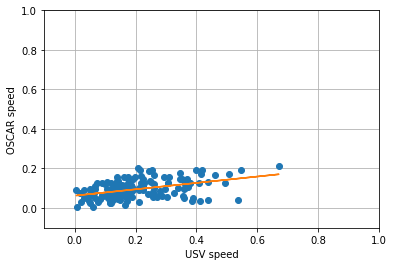

In [47]:

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api
# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

usv_spd = ds_new.spd
sat_spd = ds_collocated_averaged.spd
usv_dir = ds_new.dir
sat_dir = ds_collocated_averaged.dir
dif_spd,dif_dir = usv_spd - sat_spd, usv_dir - sat_dir
cond,cond2 = (dif_dir > 180),(dif_dir < -180)
cond,cond2 = (dif_dir > 180),(dif_dir < -180)
dif_dir[cond]-=360
dif_dir[cond2]+=360

usv_ucur = ds_new.vel_east
usv_vcur = ds_new.vel_north
sat_ucur = ds_collocated_averaged.u
sat_vcur = ds_collocated_averaged.v
usv_spd  = np.sqrt(usv_ucur**2 + usv_vcur**2)
sat_spd  = np.sqrt(sat_ucur**2 + sat_vcur**2)

cond = (np.isfinite(usv_spd) & np.isfinite(sat_spd))
usv_spd = usv_spd[cond]
sat_spd = sat_spd[cond]
usv_dir = usv_dir[cond]
sat_dir = sat_dir[cond]

xi = usv_spd.data
A = array([ xi, ones(sat_spd.shape[0])])
y = sat_spd.data
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.plot(xi,y,'o', xi, line)
plt.ylim(-.1,1),plt.xlim(-.1,1)
plt.grid()
plt.xlabel('USV speed')
plt.ylabel('OSCAR speed')
print(slope,intercept,r_value,p_value,std_err)

fig_fname='F:/data/cruise_data/saildrone/baja-2018/figs/oscar_usv_big_spd.png'
plt.savefig(fig_fname, transparent=False, format='png')

#pylab.title('Linear Fit with Matplotlib')
#ax = plt.gca()
#ax.set_axis_bgcolor((0.898, 0.898, 0.898))
#fig = plt.gcf()
#py.plot_mpl(fig, filename='linear-Fit-with-matplotlib')



0.27658743543252745 -0.0011923887293564675 0.6666748494328402 1.2526145088554306e-20 0.025418329264844764
0.25503904326658766 -0.026807894258679858 0.5685313728861343 3.2225116457853236e-14 0.030334901843883065
0.17560735742603198 0.060752692787064695 0.4827181530373511 3.9579624327693986e-10 0.026188531117316994


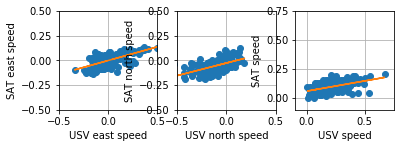

In [46]:
usv_ucur = ds_new.vel_east
usv_vcur = ds_new.vel_north
sat_ucur = ds_collocated_averaged.u
sat_vcur = ds_collocated_averaged.v

cond = (np.isfinite(usv_ucur) & np.isfinite(sat_ucur) & ( usv_vcur<.2))
usv_ucur = usv_ucur[cond]
sat_ucur = sat_ucur[cond]
usv_vcur = usv_vcur[cond]
sat_vcur = sat_vcur[cond]

xi = usv_ucur.data
A = array([ xi, ones(usv_ucur.shape[0])])
y = sat_ucur.data
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.subplot(231)
plt.plot(xi,y,'o', xi, line)
plt.ylim(-.5,.5),plt.xlim(-.5,.5)
plt.grid()
plt.xlabel('USV east speed')
plt.ylabel('SAT east speed')
print(slope,intercept,r_value,p_value,std_err)
xi = usv_vcur.data
A = array([ xi, ones(usv_vcur.shape[0])])
y = sat_vcur.data
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.subplot(232)
plt.plot(xi,y,'o', xi, line)
plt.xlabel('USV north speed')
plt.ylabel('SAT north speed')
print(slope,intercept,r_value,p_value,std_err)
plt.ylim(-.5,.5),plt.xlim(-.5,.5)
plt.grid()
xi = np.sqrt(usv_vcur.data**2 + usv_ucur.data**2)
A = array([ xi, ones(usv_vcur.shape[0])])
y = np.sqrt(sat_vcur.data**2+sat_ucur.data**2)
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.subplot(233)
plt.plot(xi,y,'o', xi, line)
plt.ylim(-.1,.75),plt.xlim(-.1,.75)
plt.grid()
plt.xlabel('USV speed')
plt.ylabel('SAT speed')
print(slope,intercept,r_value,p_value,std_err)
fig_fname='F:/data/cruise_data/saildrone/baja-2018/figs/sat_current_U_V_speed.png'
plt.savefig(fig_fname, transparent=False, format='png')


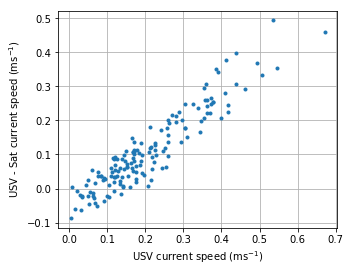

In [34]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(usv_spd,usv_spd - sat_spd,'.')
ax.grid(True)
ax.set_xlabel('USV current speed (ms$^{-1}$)')
ax.set_ylabel('USV - Sat current speed (ms$^{-1}$)')
fig_fname='F:/data/cruise_data/saildrone/baja-2018/figs/sat_current_USV_minus_Sat_fnct_USV.png'
fig.savefig(fig_fname, transparent=False, format='png')


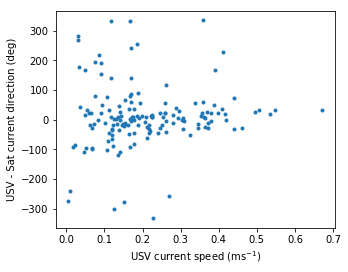

In [33]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(usv_spd,usv_dir - sat_dir,'.')
ax.set_xlabel('USV current speed (ms$^{-1}$)')
ax.set_ylabel('USV - Sat current direction (deg)')
fig_fname='F:/data/cruise_data/saildrone/baja-2018/figs/sat_current_both_bias.png'
fig.savefig(fig_fname, transparent=False, format='png')


C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\xarray\core\nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


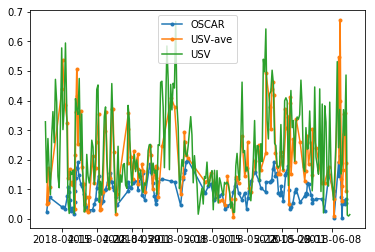

In [29]:
ds_usv_subset['cur_spd']=np.sqrt(ds_usv_subset.vel_east**2+ds_usv_subset.vel_north**2)
ds_usv_6hr=ds_usv_subset.resample(time='6H').mean()
ds_usv_6hr['cur_spd']=np.sqrt(ds_usv_6hr.vel_east**2+ds_usv_6hr.vel_north**2)


plt.plot(ds_collocated_averaged.time[cond],sat_spd,'.-')
plt.plot(ds_collocated_averaged.time[cond],usv_spd,'.-')
plt.plot(ds_usv_6hr.time,ds_usv_6hr.cur_spd)
plt.legend({'OSCAR','USV','USV-ave'})
fig_fname='F:/data/cruise_data/saildrone/baja-2018/figs/sat_current_timeseries_bias.png'
fig.savefig(fig_fname, transparent=False, format='png')


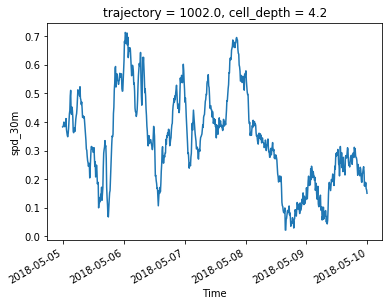

In [30]:
ds_usv.spd_30m.sel(time=slice('2018-05-05','2018-05-09')).plot()
